In [16]:
import numpy as np
import matplotlib.pyplot as plt

from tests import *

In [3]:
run_test('loop', repeat=6)

Building...
Running test loop for 6 times...


[0.844405, 0.799665, 0.801539, 0.828816, 0.582305, 0.919295]

In [14]:
sorted(get_all_tests())

[u'call0',
 u'call1',
 u'call2',
 u'call3',
 u'call4',
 u'call5',
 u'call6',
 u'call7',
 u'create_process',
 u'create_thread',
 u'getpid',
 u'getppid',
 u'getuid',
 u'loop',
 u'mem_latency_128k',
 u'mem_latency_128m',
 u'mem_latency_16k',
 u'mem_latency_16m',
 u'mem_latency_1k',
 u'mem_latency_1m',
 u'mem_latency_256k',
 u'mem_latency_2k',
 u'mem_latency_2m',
 u'mem_latency_32k',
 u'mem_latency_32m',
 u'mem_latency_4k',
 u'mem_latency_4m',
 u'mem_latency_512k',
 u'mem_latency_64k',
 u'mem_latency_64m',
 u'mem_latency_8k',
 u'mem_latency_8m',
 u'nanosleep',
 u'rdtsc',
 u'switch_process',
 u'switch_thread']

In [21]:
def plot_results(tests, res, violin=True, ticks=None):
    res = [res[t] for t in tests]
    x = range(1, len(tests) + 1)
    y = [np.median(r) for r in res]
    plt.figure(figsize=(10, 8))
    plt.plot(x, y, 'o-')
    if violin:
        plt.violinplot(res)
    plt.ylim(ymin=0)
    if ticks is None:
        ticks = tests
    plt.xticks(x, ticks)

In [43]:
call_tests = ['call0', 'call1', 'call2', 'call3', 'call4', 'call5', 'call6', 'call7']
call_res = run_tests(*call_tests)

Running test call0 for 10 times...
Running test call1 for 10 times...
Running test call2 for 10 times...
Running test call3 for 10 times...
Running test call4 for 10 times...
Running test call5 for 10 times...
Running test call6 for 10 times...
Running test call7 for 10 times...


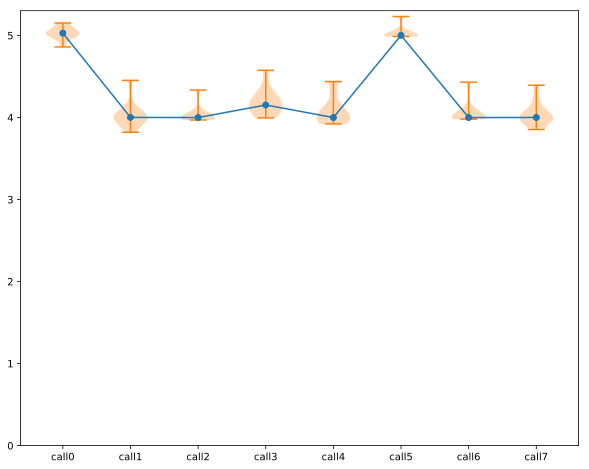

In [44]:
plot_results(call_tests, call_res)

In [28]:
short_name = '1k 2k 4k 8k 16k 32k 64k 128k 256k 512k 1m 2m 4m 8m 16m 32m 64m 128m'.split()
tests = ['mem_latency_' + t for t in short_name]
res = run_tests(*tests, repeat=10)
res = { k[12:]: v for k, v in res.items() }

Running test mem_latency_1k for 10 times...
Running test mem_latency_2k for 10 times...
Running test mem_latency_4k for 10 times...
Running test mem_latency_8k for 10 times...
Running test mem_latency_16k for 10 times...
Running test mem_latency_32k for 10 times...
Running test mem_latency_64k for 10 times...
Running test mem_latency_128k for 10 times...
Running test mem_latency_256k for 10 times...
Running test mem_latency_512k for 10 times...
Building...
Running test mem_latency_1m for 10 times...
Running test mem_latency_2m for 10 times...
Running test mem_latency_4m for 10 times...
Running test mem_latency_8m for 10 times...
Running test mem_latency_16m for 10 times...
Running test mem_latency_32m for 10 times...
Running test mem_latency_64m for 10 times...
Building...
Running test mem_latency_128m for 10 times...


In [36]:
res['128m'] = run_test('mem_latency_128m')

Building...
Running test mem_latency_128m for 10 times...


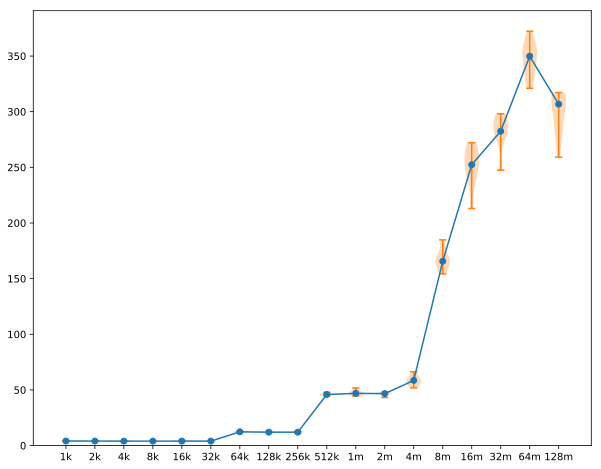

In [37]:
plot_results(short_name, res, violin=True)

In [250]:
run_test('loop')

Building...
Running test loop for 10 times...


[0.994383,
 1.004399,
 1.003509,
 0.982663,
 1.031598,
 1.037818,
 1.020567,
 0.985432,
 1.139565,
 0.967627]

Running test switch_thread for 10 times... Duration: 0.311s


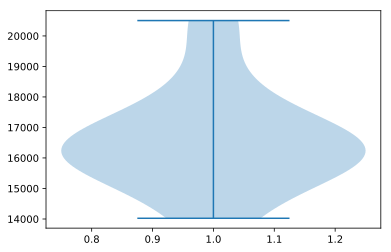

[16436.07,
 15519.32,
 16421.992,
 15764.216,
 16059.454,
 14023.524,
 20503.67,
 18222.312,
 16634.128,
 16596.284]

In [60]:
res = run_test('switch_thread')
plt.violinplot(res)
plt.show()
res